# Ensemble learning

In [1]:
# conda install jupyter ipykernel nb_conda jupyterlab matplotlib seaborn pandas numpy scikit-learn scipy lightgbm xgboost catboost

# Downloading data

source = 'https://www.kaggle.com/antfarol/car-sale-advertisements/download'

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline

In [3]:
# !wget -O car_ad.csv https://www.kaggle.com/antfarol/car-sale-advertisements/download/car_ad.csv

In [4]:
# df = pd.read_csv("car_ad.csv", sep='delimiter', header=None)
# df.head(1000)

In [5]:
import os

link = os.path.expanduser("~/Downloads/car_ad.csv")
print(link)
df = pd.read_csv(link, encoding="latin1")
df.head()

/Users/artyomkolas/Downloads/car_ad.csv


,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


# Pre-Processing

https://github.com/kolasdevpy/Regressions/blob/master/Multiple%20Linear%20Regression.ipynb

In [6]:
df.replace("?", np.nan, inplace = True)
df.head(2)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear


In [7]:
features = ['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration', 'year', 'model', 'drive']
for el in features:
    print(f'=============================== {el} =============================')
    print(df[el].value_counts(dropna=False))

=============================== car =============================
Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
VAZ              489
                ... 
Changan            1
Maserati           1
Barkas             1
Mercury            1
Aro                1
Name: car, Length: 87, dtype: int64
=============================== price =============================
0.00000        267
8500.00000      92
6500.00000      86
7500.00000      85
10500.00000     83
              ... 
26220.28500      1
67900.00000      1
3333.00000       1
460.00000        1
11280.79875      1
Name: price, Length: 1353, dtype: int64
=============================== body =============================
sedan        3646
crossover    2069
hatch        1252
van          1049
other         838
vagon         722
Name: body, dtype: int64
=============================== mileage =============================
0      348
1      304
200    171
150    131
250    128
      ... 
427      1
840

In [8]:
df.dtypes

car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object

In [9]:
df['drive'].replace(to_replace="front", value=1, inplace=True)
df['drive'].replace(to_replace="rear",  value=3, inplace=True)
df['drive'].replace(to_replace="full",  value=2, inplace=True)
df['drive'].replace(np.nan,                   4, inplace=True)
df['drive'] = df['drive'].astype("int")
df['drive'].value_counts(dropna=False)

1    5188
2    2500
3    1377
4     511
Name: drive, dtype: int64

In [10]:
df[['price']] = df[['price']].astype("int")
print(df['price'].value_counts(dropna=False))

0        267
8500      92
6500      86
7500      85
10500     83
        ... 
6928       1
6880       1
10974      1
2778       1
13972      1
Name: price, Length: 1348, dtype: int64


In [11]:
df['body'].replace(to_replace="sedan",     value=1, inplace=True)
df['body'].replace(to_replace="crossover", value=2, inplace=True)
df['body'].replace(to_replace="hatch",     value=3, inplace=True)
df['body'].replace(to_replace="van",       value=4, inplace=True)
df['body'].replace(to_replace="other",     value=5, inplace=True)
df['body'].replace(to_replace="vagon",     value=6, inplace=True)

df[['body']] = df[['body']].astype("int")
print(df['body'].value_counts(dropna=False))


1    3646
2    2069
3    1252
4    1049
5     838
6     722
Name: body, dtype: int64


In [12]:
df['engType'].replace(to_replace="Petrol",     value=1, inplace=True)
df['engType'].replace(to_replace="Diesel",     value=2, inplace=True)
df['engType'].replace(to_replace="Gas",        value=3, inplace=True)
df['engType'].replace(to_replace="Other",      value=4, inplace=True)

df[['engType']] = df[['engType']].astype("int")
print(df['engType'].value_counts(dropna=False))


1    4379
2    3013
3    1722
4     462
Name: engType, dtype: int64


In [13]:
df.dtypes

car              object
price             int64
body              int64
mileage           int64
engV            float64
engType           int64
registration     object
year              int64
model            object
drive             int64
dtype: object

In [14]:
df.shape

(9576, 10)

In [15]:
df.dropna(subset=['engV'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

df['engV'].value_counts(dropna=False)

2.00     1539
1.60     1229
3.00      703
1.50      692
1.80      585
         ... 
1.36        1
22.00       1
1.79        1
1.35        1
2.28        1
Name: engV, Length: 117, dtype: int64

In [16]:
df.shape

(9142, 10)

In [17]:
print(df['registration'].value_counts(dropna=False))

yes    8613
no      529
Name: registration, dtype: int64


In [18]:
df['registration'].replace(to_replace="yes",  value=1, inplace=True)
df['registration'].replace(to_replace="no",   value=2, inplace=True)
df[['registration']] = df[['registration']].astype("int")
print(df['registration'].value_counts(dropna=False))

1    8613
2     529
Name: registration, dtype: int64


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['car'] = le.fit_transform(df['car'])
df['model'] = le.fit_transform(df['model'])

In [20]:
df.head(10)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,23,15500,2,68,2.5,3,1,2010,482,2
1,50,20500,1,173,1.8,3,1,2011,327,3
2,50,35000,5,135,5.5,1,1,2008,235,3
3,50,17800,4,162,1.8,2,1,2012,203,1
4,55,16600,2,83,2.0,1,1,2013,833,2
5,30,6500,1,199,2.0,1,1,2003,175,1
6,60,10500,6,185,1.5,2,1,2011,551,1
7,50,21500,1,146,1.8,3,1,2012,327,3
8,50,22700,1,125,2.2,2,1,2010,327,3
9,55,20447,2,0,1.2,1,1,2016,639,1


# Data cleaning

In [21]:
df = df.loc[df['price'] != 0] 
df.reset_index(drop=True, inplace=True)
df['price'].value_counts(dropna=False)

8500     90
7500     82
6500     80
10500    80
3500     76
         ..
28777     1
23880     1
50499     1
13621     1
407       1
Name: price, Length: 1301, dtype: int64

In [22]:
df = df.loc[df['price'] < 200000] 
df.reset_index(drop=True, inplace=True)
df['price'].value_counts(dropna=False)

8500      90
7500      82
10500     80
6500      80
3500      76
          ..
35162      1
35138      1
45600      1
10550      1
123000     1
Name: price, Length: 1287, dtype: int64

In [23]:
df = df.loc[df['engV'] > 0.5] 
df.reset_index(drop=True, inplace=True)
df['engV'].value_counts(dropna=False)

2.00    1509
1.60    1210
1.50     681
3.00     633
1.80     581
        ... 
1.36       1
1.79       1
6.40       1
1.35       1
2.28       1
Name: engV, Length: 113, dtype: int64

In [24]:
df = df.loc[df['engV'] < 10] 
df.reset_index(drop=True, inplace=True)
df['engV'].value_counts(dropna=False)

2.00    1509
1.60    1210
1.50     681
3.00     633
1.80     581
        ... 
1.24       1
1.79       1
9.00       1
1.35       1
2.28       1
Name: engV, Length: 93, dtype: int64

In [25]:
df = df.loc[df['year'] > 1980] 
df.reset_index(drop=True, inplace=True)
df['year'].value_counts(dropna=False)

2008    1096
2007     869
2012     714
2011     666
2013     574
2006     536
2005     380
2010     372
2016     368
2009     326
2004     323
2014     310
2003     264
2000     213
2002     210
2001     197
2015     197
1999     149
1998     140
1997     113
1996     111
1995      84
1994      73
1991      64
1992      60
1990      58
1988      56
1993      50
1989      46
1986      41
1987      39
1985      21
1984      15
1982      10
1983       7
1981       5
Name: year, dtype: int64

In [26]:
df = df.loc[df['mileage'] > 1] 
df.reset_index(drop=True, inplace=True)
df['mileage'].value_counts(dropna=False)

200    161
250    122
150    119
180    114
160    114
      ... 
520      1
600      1
427      1
840      1
547      1
Name: mileage, Length: 435, dtype: int64

In [27]:
df = df.loc[df['mileage'] < 400] 
df.reset_index(drop=True, inplace=True)
df['mileage'].value_counts(dropna=False)

200    161
250    122
150    119
160    114
180    114
      ... 
392      1
384      1
356      1
336      1
389      1
Name: mileage, Length: 377, dtype: int64

In [28]:
df.shape

(8110, 10)

In [29]:
target_column = ['price'] 
predictors = list(set(list(df.columns))-set(target_column))

# normalization
df[predictors] = df[predictors]/df[predictors].max()

df.describe()

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000,8110.000000
mean,0.563309,13943.037608,0.422503,0.364972,0.247409,0.445684,0.530641,0.995275,0.509457,0.416523
std,0.300243,15881.944895,0.274419,0.205442,0.107218,0.214278,0.119931,0.003035,0.284707,0.219231
min,0.000000,370.000000,0.166667,0.005025,0.066667,0.250000,0.500000,0.982639,0.000000,0.250000
25%,0.277108,5500.000000,0.166667,0.211055,0.177778,0.250000,0.500000,0.994048,0.252304,0.250000
50%,0.602410,9300.000000,0.333333,0.339196,0.222222,0.500000,0.500000,0.996032,0.542051,0.250000
75%,0.831325,15900.000000,0.666667,0.497487,0.277778,0.500000,0.500000,0.997520,0.731567,0.500000
max,1.000000,195000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
predictors

['engType',
 'engV',
 'year',
 'drive',
 'car',
 'model',
 'mileage',
 'registration',
 'body']

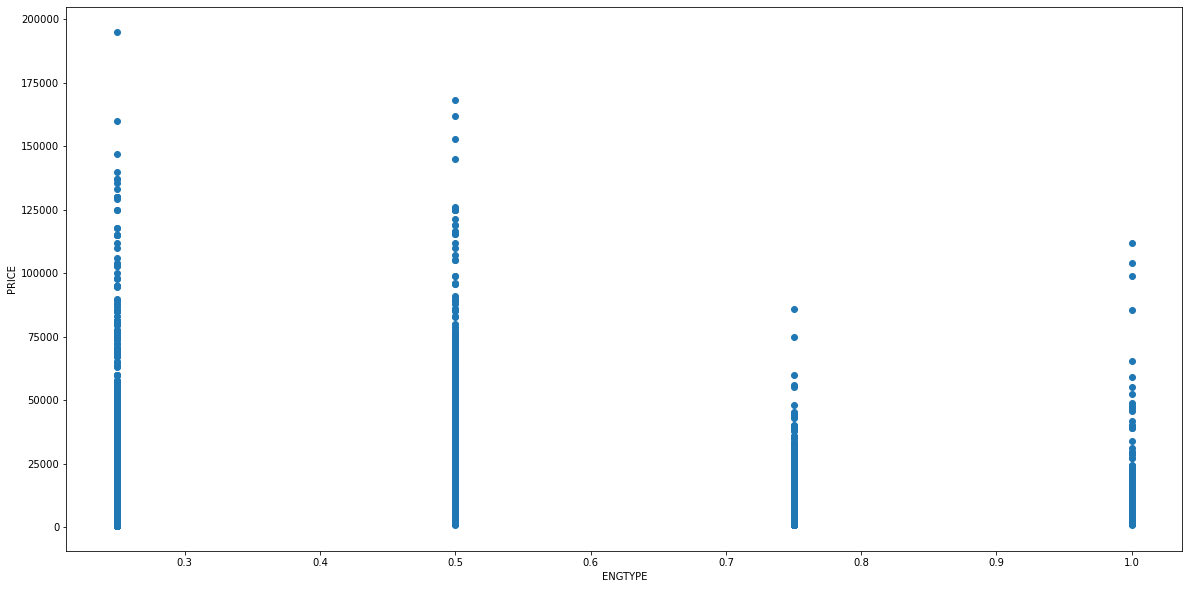

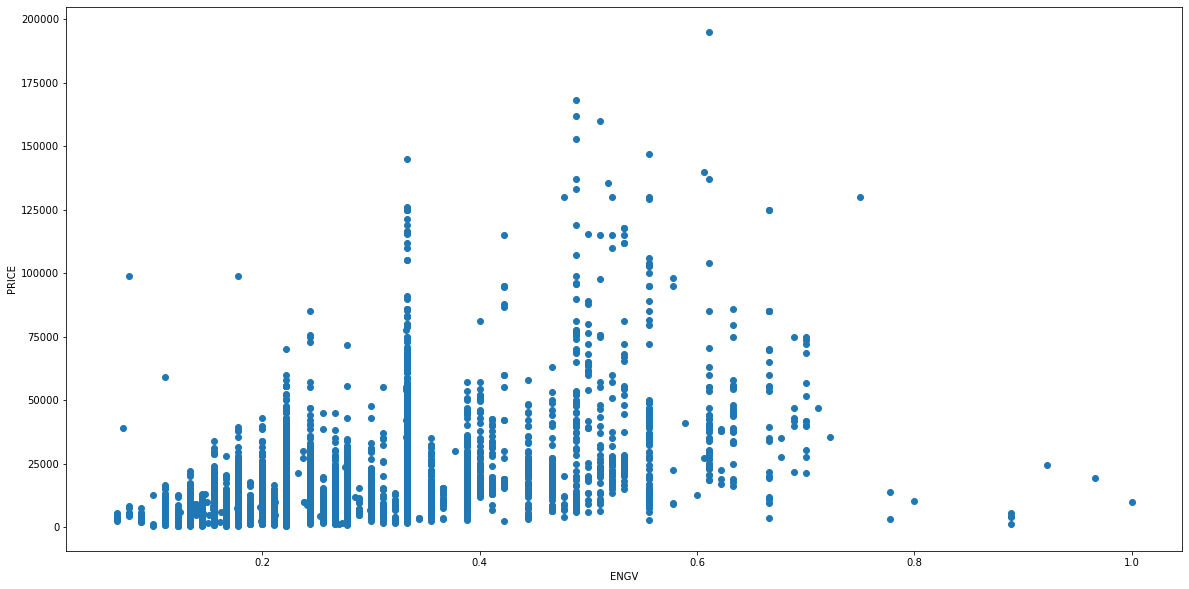

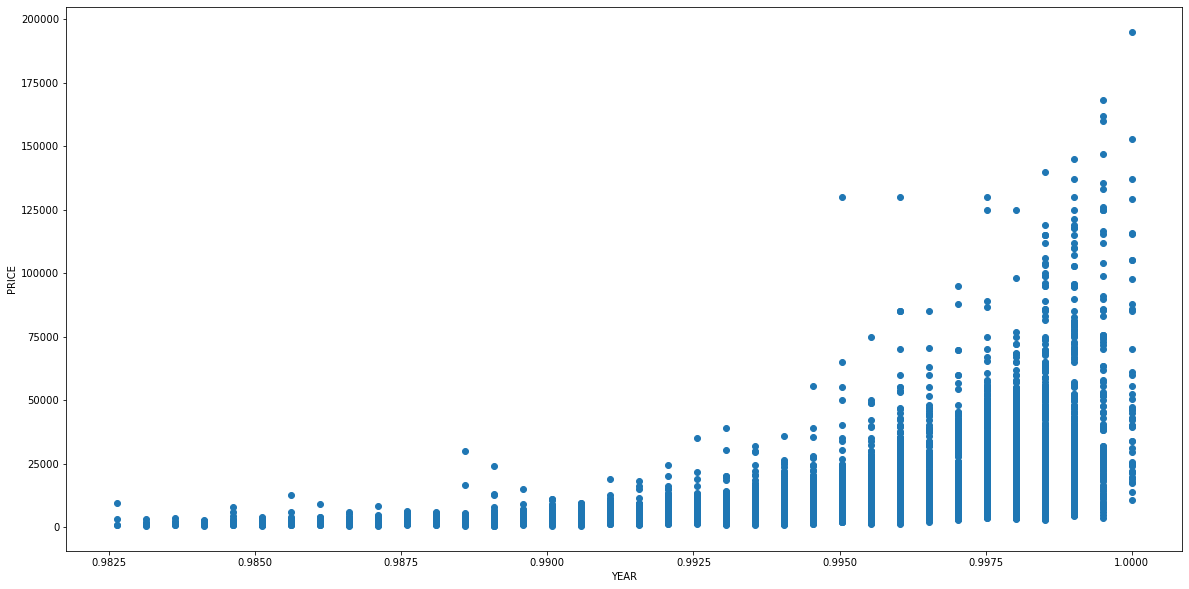

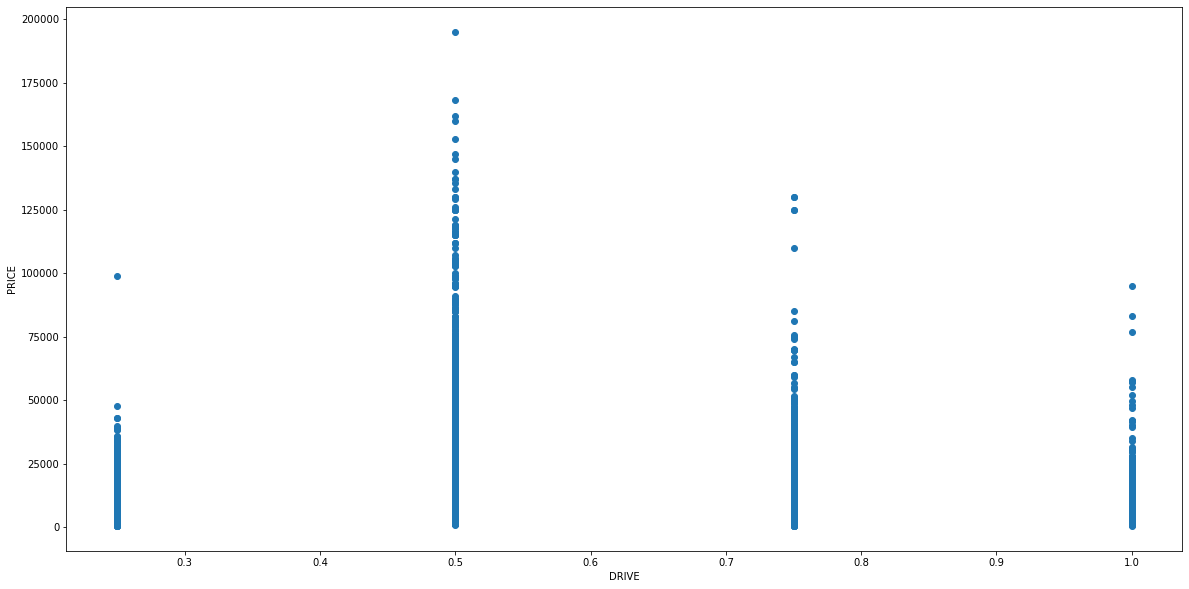

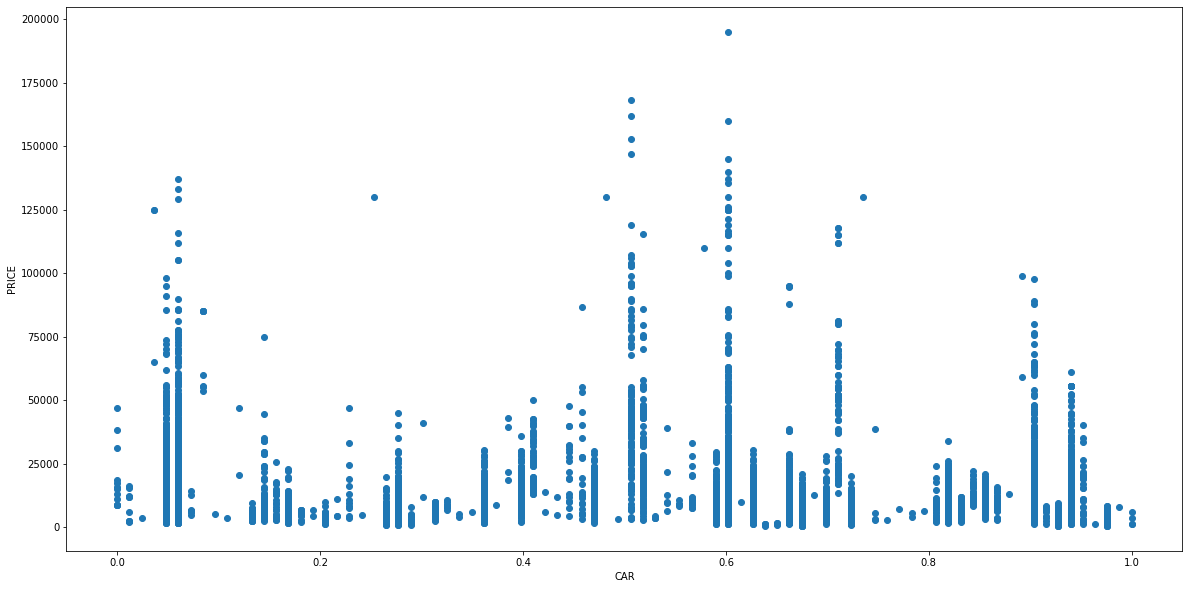

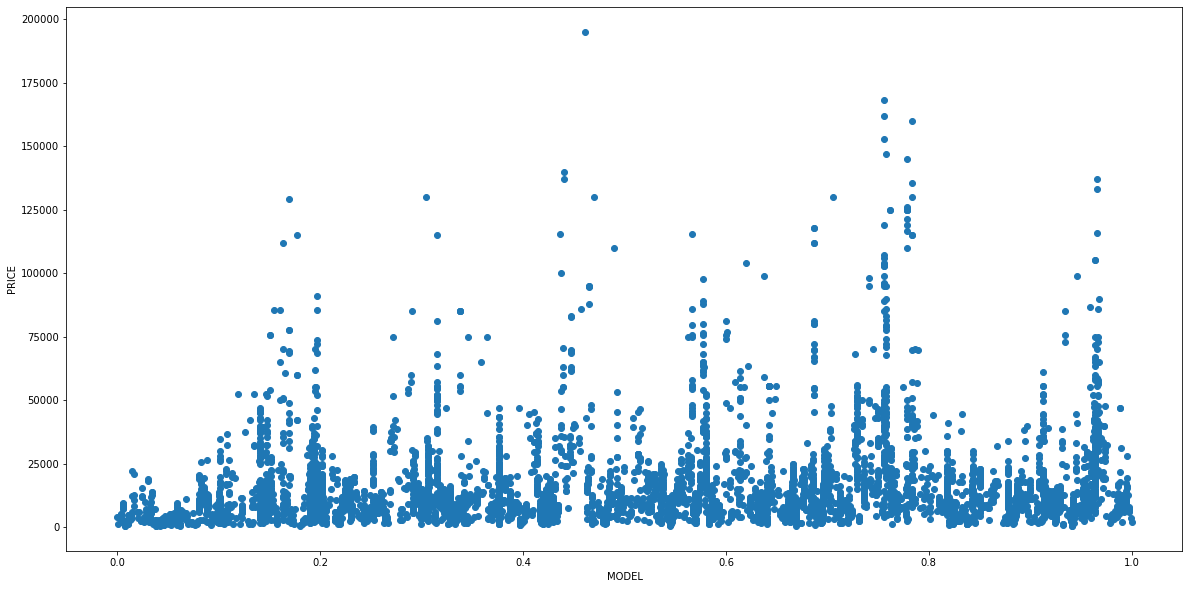

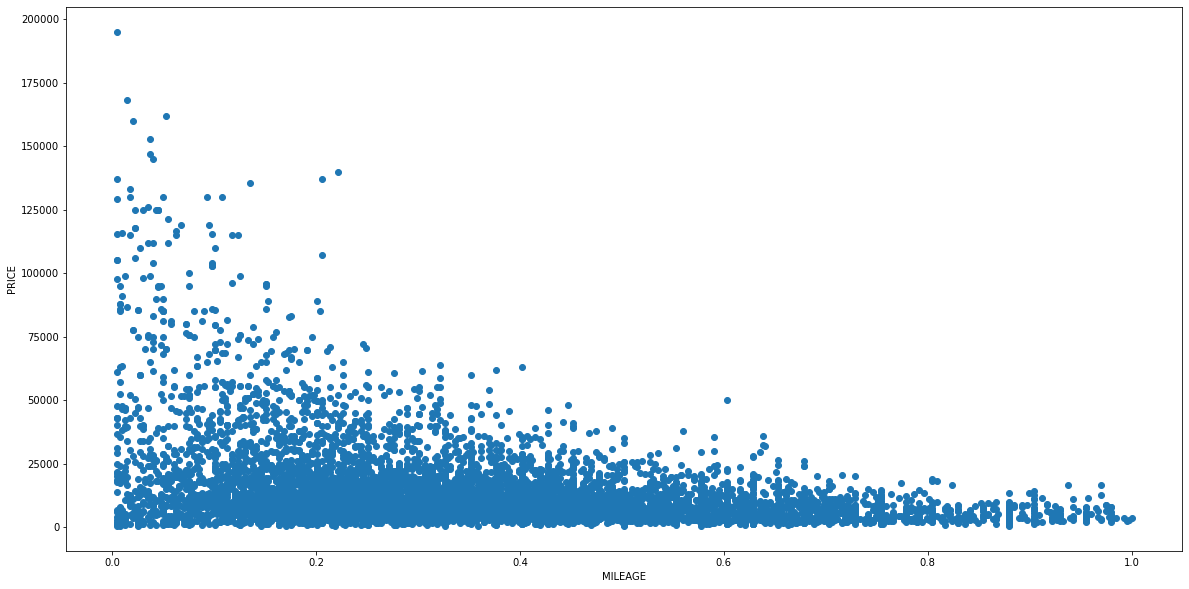

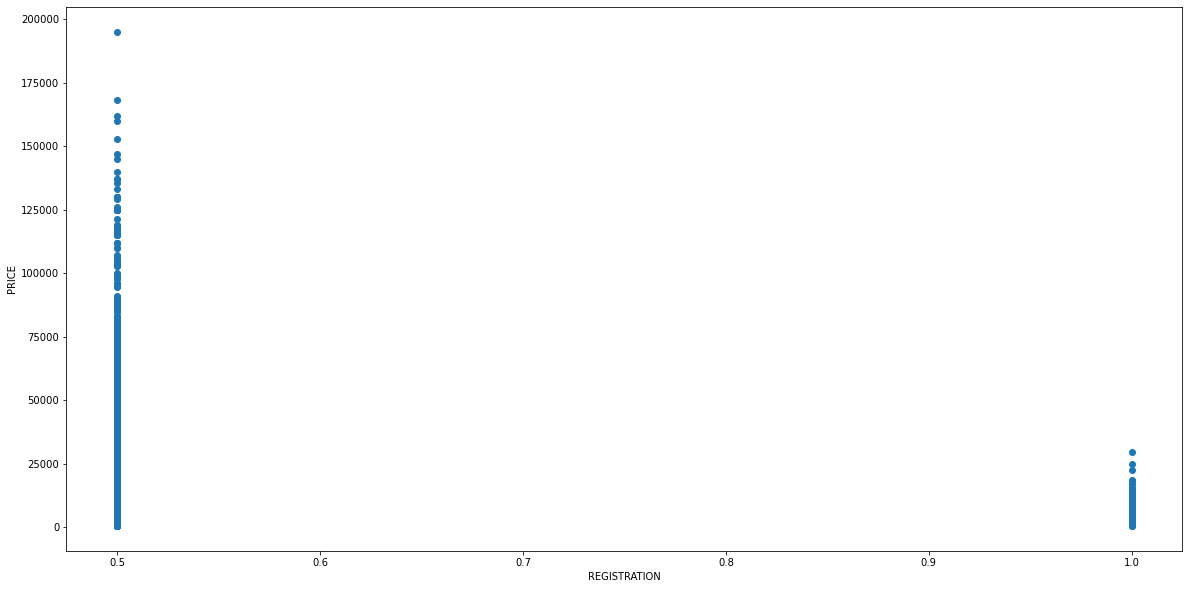

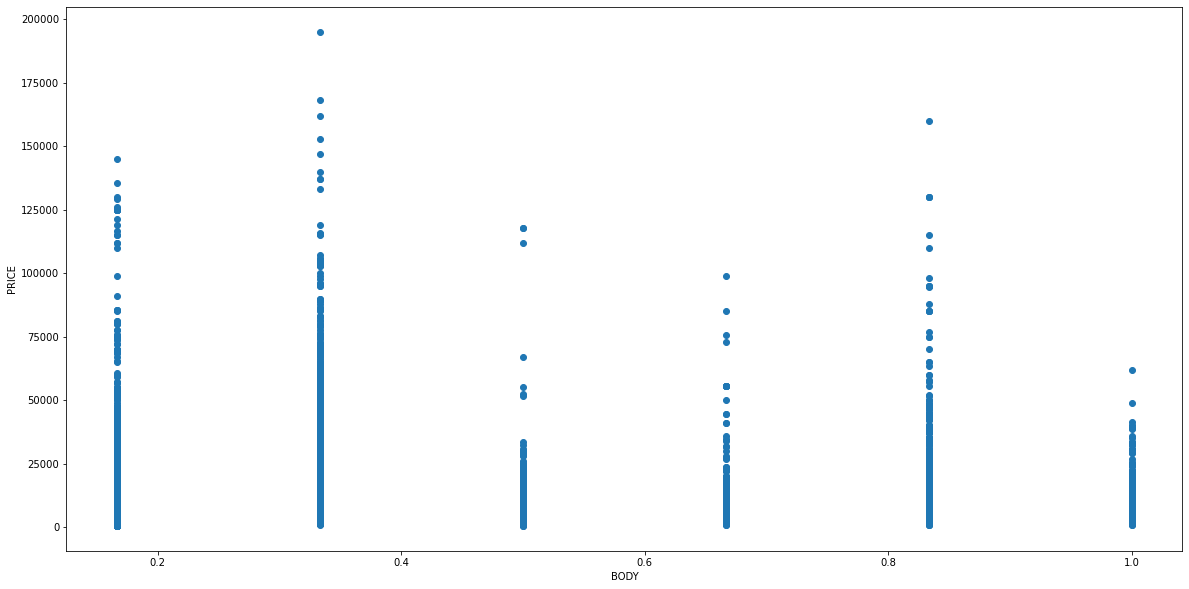

In [31]:
for el in predictors:
    print('')
    label = el
    el = df[el]
    plt.figure(figsize=(20,10))
    try:
        plt.scatter(el, df.price)
    except:
        print(Error)
    plt.xlabel(label.upper())
    plt.ylabel("PRICE")
    plt.show()
    print('')

# GBoosting + feature selection + bagging (including train_test_split)

In [48]:
X = predictors    # type list !!!

y = df[target_column]    # df
y = np.ravel(y)

# OUTPUT_quantity_of_best_results______________________________________________________
show_quantity_of_best_evaluations = 10


def get_combinations(X):
    '''get all combinations of X features'''
    import itertools
    global combinations
    combinations = []

# # ALL FEATURES COMBINATIONS____X + ALL(X-1)____________________________________________
    dubl_X = X[:]
    combinations.append(X)
    j=0
    for el in X:
        del dubl_X[j]
        combinations.append(dubl_X)
        dubl_X = X[:]
        j+=1
        
# # ALL FEATURES COMBINATIONS____or_last_1/3_______________________________________________
#     for L in range(0, len(X)+1):
#          for subset in itertools.combinations(X, L):
#             subset = list(subset)
#             combinations.append(subset)
#     del combinations[0]
# #     combinations = combinations[int(len(combinations)/1.5):]  # return the last 1/3 of the most complete combinations of features
       
    return combinations


def iterative_evaluation(df, y, combinations):
    '''iterative evaluation of all features'''
    comand = input(f'You have {len(combinations)} combinations of X features.'
                   f' Input y/n for continuous (+ press enter/return)')
    if comand == 'n':
        return 'OK'
    elif comand == 'y':
        
# Imports _________________________________________________________
        from sklearn.model_selection import train_test_split

        from sklearn.tree import DecisionTreeRegressor
        from sklearn.ensemble import RandomForestRegressor
        import lightgbm as lgb
        import xgboost as xgb
        import catboost as ctb
    

# Imports of metrics ______________________________________________
        from sklearn.metrics import mean_squared_error
        from math import sqrt
        from sklearn.metrics import r2_score
        
        
# Creare evaluations lists ________________________________________
#         global DecisionTree_evaluations
#         DecisionTree_evaluations = []
        
#         global RandomForest_evaluations
#         RandomForest_evaluations = []
        
#         global LGBM_evaluations
#         LGBM_evaluations = []
        
        global XGB_evaluations
        XGB_evaluations = []
        
        global CatBoost_evaluations
        CatBoost_evaluations = []
        
        global all_evaluations
        all_evaluations = []
        

# GLOBAL LIST OF ALL EVALUATIONS ___________________________________________________________________________        
        all_evaluations = [ # DecisionTree_evaluations, RandomForest_evaluations, LGBM_evaluations,
                            XGB_evaluations, CatBoost_evaluations]
        
# BAGGINAG _______________________________________________________________________
        global bagging_list_evaluations
        bagging_list_evaluations = []
        
        
        
# Regressor Constructor _______________________________________________
        dtree = DecisionTreeRegressor()
        model_rf = RandomForestRegressor()
        lgbm = lgb.LGBMRegressor()
        xgbm = xgb.XGBRegressor()
        ctbm = ctb.CatBoostRegressor(verbose=False)
        

        i=1    
        for el in combinations[:]:                       
            print(f'Inprogress {i}/{len(combinations)}')
            el = list(el)
            
            X = df[el]
            
# train_test_SPLIT ________________________________________________
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)
            
# Model train and evaluation ______________________________________
            # DecisionTreeRegressor
#             dtree.fit(X_train, y_train)
#             pred_test_tree= dtree.predict(X_test)
#             MSE = np.sqrt(mean_squared_error(y_test,pred_test_tree)) 
#             R2 = r2_score(y_test, pred_test_tree)
#             DecisionTree_evaluations.append([float('{:.6f}'.format(R2)), float('{:.6f}'.format(MSE)), 'DecisionTree:', el])
            

#             # RandomForestRegressor
#             model_rf.fit(X_train, y_train) 
#             pred_test_rf = model_rf.predict(X_test)
#             MSE = np.sqrt(mean_squared_error(y_test,pred_test_rf)) 
#             R2 = r2_score(y_test, pred_test_rf)
#             RandomForest_evaluations.append([float('{:.6f}'.format(R2)), float('{:.6f}'.format(MSE)), 'RandomForest:', el])

            
#             # LGBMRegressor
#             lgbm.fit(X_train,y_train)
#             pred_test_lgb = lgbm.predict(X_test)
#             MSE = np.sqrt(mean_squared_error(y_test,pred_test_lgb)) 
#             R2 = r2_score(y_test, pred_test_lgb)
#             LGBM_evaluations.append([float('{:.6f}'.format(R2)), float('{:.6f}'.format(MSE)), 'LGBMRegressor:', el])
            
            
            # XGBRegressor
            xgbm.fit(X_train, y_train)
            pred_test_xgb = xgbm.predict(X_test)
            MSE = np.sqrt(mean_squared_error(y_test,pred_test_xgb)) 
            R2 = r2_score(y_test, pred_test_xgb)
            XGB_evaluations.append([float('{:.6f}'.format(R2)), float('{:.6f}'.format(MSE)), 'XGBRegressor:', el])
            
            
            # CatBoostRegressor
            ctbm.fit(X_train, y_train)
            pred_test_ctb = ctbm.predict(X_test)
            MSE = np.sqrt(mean_squared_error(y_test,pred_test_ctb)) 
            R2 = r2_score(y_test, pred_test_ctb)
            CatBoost_evaluations.append([float('{:.6f}'.format(R2)), float('{:.6f}'.format(MSE)), 'CatBoostRegr:', el])
            
            
# Bagging _________________________________________________________________________
            bagging_predict = (pred_test_xgb + pred_test_ctb)/2
            MSE = np.sqrt(mean_squared_error(y_test,bagging_predict)) 
            R2 = r2_score(y_test, bagging_predict)
            bagging_list_evaluations.append([float('{:.6f}'.format(R2)), float('{:.6f}'.format(MSE)), 'Bagging_XGB,CAT', el])
            
            
            i+=1
        return all_evaluations, bagging_list_evaluations
    
    else:
        return 'invalid command'

    
    
def get_sorted_evaluations(all_evaluations, bagging_list_evaluations, show_quantity_of_best_evaluations):
    '''sort and show list of evaluations'''
    
    global TOTAL_evaluations
    TOTAL_evaluations = []
    
    for list_evaluations in all_evaluations:
        list_evaluations.sort(reverse=True)
        
        show = list_evaluations[:show_quantity_of_best_evaluations]
        print("")
        print("___SORTED  EVALUATIONS  for   REGRESSOR:___")
        print("")
        print("R2_score         MSE         REGRESSOR       FEATURES")
        print("")

        for for_regressor in show:
            print("{:1.6f}   {:12.2f}    {:15}".format(for_regressor[0], for_regressor[1], for_regressor[2]), for_regressor[3])
            print("")
            TOTAL_evaluations.append(for_regressor)
        
        print(f"{len(show)} best evaluations")
        print("")
        print("")
        
    TOTAL_evaluations.sort(reverse=True)
    
    print("=====================================================================================================")
    print("")
        
    print(f"___ THE  BEST  SORTED  EVALUATIONS for ALL ___ first {show_quantity_of_best_evaluations} best evaluations")
    print("")
    print("R2_score         MSE         REGRESSOR       FEATURES")
    print("")
    
    for evaluations in TOTAL_evaluations[:show_quantity_of_best_evaluations]:
        print("{:1.6f}   {:12.2f}     {:15}".format(evaluations[0], evaluations[1], evaluations[2]), evaluations[3])
        print("")
    print(f"{show_quantity_of_best_evaluations} best evaluations")
    print("")
    print("")
    print("=====================================================================================================")
    print("=====================================================================================================")
    
    print(f"___ BAGGING  EVALUATIONS for ALL ___ first {show_quantity_of_best_evaluations} best evaluations")
    print("")
    print("R2_score         MSE         REGRESSOR       FEATURES")
    print("")
    
    bagging_list_evaluations.sort(reverse=True)
    
    for evaluations in bagging_list_evaluations[:show_quantity_of_best_evaluations]:
        print("{:1.6f}   {:12.2f}     {:15}".format(evaluations[0], evaluations[1], evaluations[2]), evaluations[3])
        print("")

        
get_combinations(X)
iterative_evaluation(df, y, combinations)
get_sorted_evaluations(all_evaluations, bagging_list_evaluations, show_quantity_of_best_evaluations)

You have 10 combinations of X features. Input y/n for continuous (+ press enter/return) y


Inprogress 1/10
Inprogress 2/10
Inprogress 3/10
Inprogress 4/10
Inprogress 5/10
Inprogress 6/10
Inprogress 7/10
Inprogress 8/10
Inprogress 9/10
Inprogress 10/10

___SORTED  EVALUATIONS  for   REGRESSOR:___

R2_score         MSE         REGRESSOR       FEATURES

0.915686        4076.35    XGBRegressor:   ['engType', 'engV', 'year', 'drive', 'car', 'model', 'registration', 'body']

0.911378        4179.18    XGBRegressor:   ['engType', 'engV', 'year', 'drive', 'car', 'model', 'mileage', 'registration', 'body']

0.903318        4365.09    XGBRegressor:   ['engType', 'engV', 'year', 'drive', 'car', 'model', 'mileage', 'registration']

0.901908        4396.80    XGBRegressor:   ['engV', 'year', 'drive', 'car', 'model', 'mileage', 'registration', 'body']

0.899783        4444.18    XGBRegressor:   ['engType', 'engV', 'year', 'drive', 'car', 'model', 'mileage', 'body']

0.894218        4565.90    XGBRegressor:   ['engType', 'engV', 'year', 'car', 'model', 'mileage', 'registration', 'body']

0

In [49]:
# X = predictors    # type list !!!
X = ['registration', 'engV', 'engType', 'year', 'car', 'model']


y = df[target_column]    # df
y = np.ravel(y)

# OUTPUT_quantity_of_results______________________________________________________
show_quantity_of_best_evaluations = 10


def get_combinations(X):
    '''get all combinations of X features'''
    import itertools
    global combinations
    combinations = []

# # ALL FEATURES COMBINATIONS____X + ALL(X-1)_________Time complexity O(n)___________________________________
    dubl_X = X[:]
    combinations.append(X)
    j=0
    for el in X:
        del dubl_X[j]
        combinations.append(dubl_X)
        dubl_X = X[:]
        j+=1
        
# # ALL FEATURES COMBINATIONS____or_last_1/3________________Time complexity_O(2**n)__(exponential time)________________________
#     for L in range(0, len(X)+1):
#          for subset in itertools.combinations(X, L):
#             subset = list(subset)
#             combinations.append(subset)
#     del combinations[0]
# #     combinations = combinations[int(len(combinations)/1.5):]  # return the last 1/3 of the most complete combinations of features
    
    for el in combinations:
        print(el)
    return combinations


def iterative_evaluation(df, y, combinations):
    '''iterative evaluation of all features'''
    comand = input(f'You have {len(combinations)} combinations of X features.'
                   f' Input y/n for continuous (+ press enter/return)')
    if comand == 'n':
        return 'OK'
    elif comand == 'y':
        
# Imports _________________________________________________________
        from sklearn.model_selection import train_test_split

        from sklearn.tree import DecisionTreeRegressor
        from sklearn.ensemble import RandomForestRegressor
        import lightgbm as lgb
        import xgboost as xgb
        import catboost as ctb
    

# Imports of metrics ______________________________________________
        from sklearn.metrics import mean_squared_error
        from math import sqrt
        from sklearn.metrics import r2_score
        
        
# Creare evaluations lists ________________________________________
#         global DecisionTree_evaluations
#         DecisionTree_evaluations = []
        
#         global RandomForest_evaluations
#         RandomForest_evaluations = []
        
#         global LGBM_evaluations
#         LGBM_evaluations = []
        
        global XGB_evaluations
        XGB_evaluations = []
        
        global CatBoost_evaluations
        CatBoost_evaluations = []
        
        global all_evaluations
        all_evaluations = []
        

# GLOBAL LIST OF ALL EVALUATIONS ___________________________________________________________________________        
        all_evaluations = [#DecisionTree_evaluations, RandomForest_evaluations, LGBM_evaluations,
                            XGB_evaluations, CatBoost_evaluations]
        
# BAGGINAG _______________________________________________________________________
        global bagging_list_evaluations
        bagging_list_evaluations = []
        
        
        
# Regressor Constructor _______________________________________________
        dtree = DecisionTreeRegressor()
        model_rf = RandomForestRegressor()
        lgbm = lgb.LGBMRegressor()
        xgbm = xgb.XGBRegressor()
        ctbm = ctb.CatBoostRegressor(verbose=False)
        

        i=1    
        for el in combinations[:]:                       
            print(f'Inprogress {i}/{len(combinations)}')
            el = list(el)
            
            X = df[el]
            
# train_test_SPLIT ________________________________________________
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)
            
# Model train and evaluation ______________________________________
            # DecisionTreeRegressor
#             dtree.fit(X_train, y_train)
#             pred_test_tree= dtree.predict(X_test)
#             MSE = np.sqrt(mean_squared_error(y_test,pred_test_tree)) 
#             R2 = r2_score(y_test, pred_test_tree)
#             DecisionTree_evaluations.append([float('{:.6f}'.format(R2)), float('{:.6f}'.format(MSE)), 'DecisionTree:', el])
            

#             # RandomForestRegressor
#             model_rf.fit(X_train, y_train) 
#             pred_test_rf = model_rf.predict(X_test)
#             MSE = np.sqrt(mean_squared_error(y_test,pred_test_rf)) 
#             R2 = r2_score(y_test, pred_test_rf)
#             RandomForest_evaluations.append([float('{:.6f}'.format(R2)), float('{:.6f}'.format(MSE)), 'RandomForest:', el])

            
#             # LGBMRegressor
#             lgbm.fit(X_train,y_train)
#             pred_test_lgb = lgbm.predict(X_test)
#             MSE = np.sqrt(mean_squared_error(y_test,pred_test_lgb)) 
#             R2 = r2_score(y_test, pred_test_lgb)
#             LGBM_evaluations.append([float('{:.6f}'.format(R2)), float('{:.6f}'.format(MSE)), 'LGBMRegressor:', el])
            
            
            # XGBRegressor
            xgbm.fit(X_train, y_train)
            pred_test_xgb = xgbm.predict(X_test)
            MSE = np.sqrt(mean_squared_error(y_test,pred_test_xgb)) 
            R2 = r2_score(y_test, pred_test_xgb)
            XGB_evaluations.append([float('{:.6f}'.format(R2)), float('{:.6f}'.format(MSE)), 'XGBRegressor:', el])
            
            
            # CatBoostRegressor
            ctbm.fit(X_train, y_train)
            pred_test_ctb = ctbm.predict(X_test)
            MSE = np.sqrt(mean_squared_error(y_test,pred_test_ctb)) 
            R2 = r2_score(y_test, pred_test_ctb)
            CatBoost_evaluations.append([float('{:.6f}'.format(R2)), float('{:.6f}'.format(MSE)), 'CatBoostRegr:', el])
            

# Bagging _________________________________________________________________________        
            bagging_predict = (pred_test_xgb + pred_test_ctb)/2
            MSE = np.sqrt(mean_squared_error(y_test,bagging_predict)) 
            R2 = r2_score(y_test, bagging_predict)
            bagging_list_evaluations.append([float('{:.6f}'.format(R2)), float('{:.6f}'.format(MSE)), 'Bagging_XGB,CAT', el])
            
            
            i+=1
        return all_evaluations, bagging_list_evaluations
    
    else:
        return 'invalid command'

    
    
def get_sorted_evaluations(all_evaluations, bagging_list_evaluations, show_quantity_of_best_evaluations):
    '''sort and show list of evaluations'''
    
    global TOTAL_evaluations
    TOTAL_evaluations = []
    
    for list_evaluations in all_evaluations:
        list_evaluations.sort(reverse=True)
        
        show = list_evaluations[:show_quantity_of_best_evaluations]
        print("")
        print("___SORTED  EVALUATIONS  for   REGRESSOR:___")
        print("")
        print("R2_score         MSE         REGRESSOR       FEATURES")
        print("")

        for for_regressor in show:
            print("{:1.6f}   {:12.2f}    {:15}".format(for_regressor[0], for_regressor[1], for_regressor[2]), for_regressor[3])
            print("")
            TOTAL_evaluations.append(for_regressor)
        
        print(f"{len(show)} best evaluations")
        print("")
        print("")
        
    TOTAL_evaluations.sort(reverse=True)
    
    print("=====================================================================================================")
    print("")
        
    print(f"___ THE  BEST  SORTED  EVALUATIONS for ALL ___ first {show_quantity_of_best_evaluations} best evaluations")
    print("")
    print("R2_score         MSE         REGRESSOR       FEATURES")
    print("")
    
    for evaluations in TOTAL_evaluations[:show_quantity_of_best_evaluations]:
        print("{:1.6f}   {:12.2f}     {:15}".format(evaluations[0], evaluations[1], evaluations[2]), evaluations[3])
        print("")
    print(f"{show_quantity_of_best_evaluations} best evaluations")
    print("")
    print("")
    print("=====================================================================================================")
    print("=====================================================================================================")
    
    print(f"___ BAGGING  EVALUATIONS for ALL ___ first {show_quantity_of_best_evaluations} best evaluations")
    print("")
    print("R2_score         MSE         REGRESSOR       FEATURES")
    print("")
    
    bagging_list_evaluations.sort(reverse=True)
    
    for evaluations in bagging_list_evaluations[:show_quantity_of_best_evaluations]:
        print("{:1.6f}   {:12.2f}     {:15}".format(evaluations[0], evaluations[1], evaluations[2]), evaluations[3])
        print("")

        
get_combinations(X)
iterative_evaluation(df, y, combinations)
get_sorted_evaluations(all_evaluations, bagging_list_evaluations, show_quantity_of_best_evaluations)

['registration', 'engV', 'engType', 'year', 'car', 'model']
['engV', 'engType', 'year', 'car', 'model']
['registration', 'engType', 'year', 'car', 'model']
['registration', 'engV', 'year', 'car', 'model']
['registration', 'engV', 'engType', 'car', 'model']
['registration', 'engV', 'engType', 'year', 'model']
['registration', 'engV', 'engType', 'year', 'car']


You have 7 combinations of X features. Input y/n for continuous (+ press enter/return) y


Inprogress 1/7
Inprogress 2/7
Inprogress 3/7
Inprogress 4/7
Inprogress 5/7
Inprogress 6/7
Inprogress 7/7

___SORTED  EVALUATIONS  for   REGRESSOR:___

R2_score         MSE         REGRESSOR       FEATURES

0.905624        4312.73    XGBRegressor:   ['engV', 'engType', 'year', 'car', 'model']

0.904484        4338.69    XGBRegressor:   ['registration', 'engV', 'engType', 'year', 'car', 'model']

0.901165        4413.42    XGBRegressor:   ['registration', 'engV', 'year', 'car', 'model']

0.891412        4626.06    XGBRegressor:   ['registration', 'engV', 'engType', 'year', 'model']

0.874772        4967.88    XGBRegressor:   ['registration', 'engType', 'year', 'car', 'model']

0.847829        5476.29    XGBRegressor:   ['registration', 'engV', 'engType', 'year', 'car']

0.742031        7130.24    XGBRegressor:   ['registration', 'engV', 'engType', 'car', 'model']

7 best evaluations



___SORTED  EVALUATIONS  for   REGRESSOR:___

R2_score         MSE         REGRESSOR       FEATURES

0.8

# The Best Result

R2_score___________MSE_______REGRESSOR________FEATURES

0.928544________3752.65_____CatBoostRegr:____['mileage', 'registration', 'engType', 'body', 'year', 'car', 'engV', 'model']